## 大数定律


在后面的贝叶斯点估计中，我们就会利用到期望值。在以分析为主的贝叶斯推断中，通常需要计算高微积分来得到复杂的期望值。而大数定律是估计期望的较好的方法之一。因此本实验会着重讲解大数定律的含义，以及何时有效，何时失效等问题。并且最后引入了 Reddit 网站评论排序的实例，让我们了解现行网站中的热点评论的排序算法。

假设，$ Z_i $ 表示来自某概率分布的 $N$ 次独立采样。那么，根据大数定律，只要期望 $E[Z]$ 有限，则下式成立： 

In [1]:
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
%matplotlib inline

figsize(12.5, 5)
# 假设每组都有 100000 个样本事例
sample_size = 100000
expected_value = lambda_ = 4.5
# 定义泊松分布函数
poi = np.random.poisson
# 定义出入泊松分布函数的x，采用稀释的手法，从一个大集合中的第1,101,201,301、、、这样每次增加100的取
# 一共去 sample_size 个
N_samples = range(1, sample_size, 100)
# 产生三组随机变量
samples = []
for k in range(3):
    samples.append(poi(lambda_, sample_size))
samples

[array([2, 5, 4, ..., 3, 3, 2]),
 array([5, 3, 3, ..., 3, 5, 6]),
 array([6, 4, 7, ..., 3, 3, 3])]

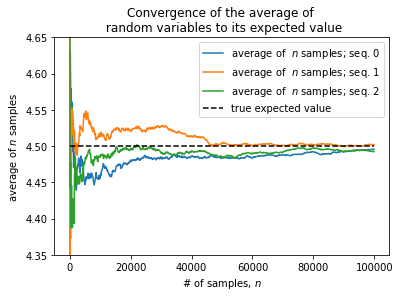

In [2]:
for k in range(3):
    # 求出第 k 组序列的前 i 个值的平均值
    # 并且形成一个新的序列
    # 根据大数定律，这里我们把计算出的平均值，当做期望
    partial_average = [samples[k][:i].mean() for i in N_samples]
    plt.plot(N_samples, partial_average, lw=1.5, label="average \
of  $n$ samples; seq. %d" % k)

# 画出实际的期望
plt.plot(N_samples, expected_value*np.ones_like(partial_average),
         ls="--", label="true expected value", c="k")

plt.ylim(4.35, 4.65)
plt.title("Convergence of the average of \n random variables to its \
expected value")
plt.ylabel("average of $n$ samples")
plt.xlabel("# of samples, $n$")
plt.legend()

In [3]:
# 定义一共 250 组样本集合
N_Y = 250
# 定义每组样本共 50000
# 从np的泊松数据集中取，每隔2500 取一次
N_array = np.arange(1000, 50000, 2500)
# 定义装 Dn 的数据集合
D_N_results = np.zeros(len(N_array))
# 定义 Z(i) 的期望
lambda_ = 4.5
expected_value = lambda_  # 因为 X ~ Poi(lambda) , E[ X ] = lambda


def D_N(n):
    """
   该函数为上面式子的代码实现
    """
    # 计算 N_Y 组样本集合
    Z = poi(lambda_, (n, N_Y))
    # 计算前n个样本的，所有数据的平均值
    average_Z = Z.mean(axis=0)
    # 得到 dn
    return np.sqrt(((average_Z - expected_value)**2).mean())


for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)
D_N_results

array([0.0669717 , 0.03519369, 0.02762318, 0.02181996, 0.01936732,
       0.01890764, 0.01791636, 0.01568625, 0.01393591, 0.01372669,
       0.01383859, 0.01192139, 0.01191875, 0.01164211, 0.01171634,
       0.01073907, 0.01066798, 0.01030035, 0.01076614, 0.00940202])

Text(0.5, 1.0, "How 'fast' is the sample average converging? ")

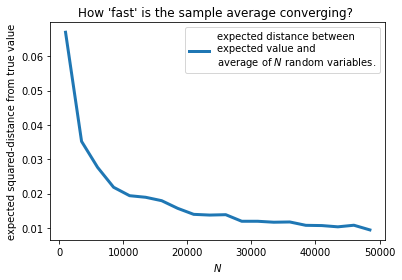

In [4]:
plt.xlabel("$N$")
plt.ylabel("expected squared-distance from true value")
plt.plot(N_array, D_N_results, lw=3,
         label="expected distance between\n\
expected value and \naverage of $N$ random variables.")
plt.legend()
plt.title("How 'fast' is the sample average converging? ")

### 例子： Reddit 网站的评论排序


其实每个人都隐式地知道大数定律的有效性和无效性，并且在决策的时候会下意识地使用到这个原理。你可以想想网上的商品评论，如果一个上面被打了五星，但只有一个评论者，你会相信吗？如果有两个或者三个呢？我想大多人会说是不相信。这其实表明的就是，我们隐式的知道，评论人数很少的时候，评分的均值并不能很好的反映产品的真实价值。


因此，针对较少的评论，如果我们直接对他们的评分取平均再排序的话是很有问题的。

其实，很多人都意识到了，无论是书籍、视频还是网上评论，根据评分对搜索结果进行排序的效果其实是很差的。通常，看起来最靠前的评论（即给该视频打分最高的评论），一般都是某些狂热粉丝打出来的。而真正高品质的评论，反而被藏在了后面几页，且分数都是像劣质商品一般的 4.8分（10分制）。

这里我们拿国际上很有名的 Reddit 网站进行举例。该网站上有很多的趣事新闻。而最有趣的在于是每条新闻下的评论。“Redditors”（该网站用户的名称），可以对评论进行投票（反对或赞成）。Reddit 网站会从中选出人气最高的评论，即最佳评论。换做是你，你会判断哪一条评论最佳呢？


- 热度： 认为点赞数越多的评论越好。但问题是，可能这条评论有几百个赞，但是也有上千个反对。那么虽然这条评论热度高，但是它具有很大争议，就不适合作为最佳。
- 差数：即点赞数减去反对数。这解决了上一个指标的问题，但是不能解决评论的时间属性所导致的问题。因为一个评论可以在数小时之前才发出，但是这个评论的差数疯涨。那么尽管这条评论的差数没有一周前的老评论所积累的点赞数多，差数大，但也应当有机会获得最佳的称号。
- 时间调节：即差数除以评论寿命。这样就得到了每秒上涨的差数，就能解决上一个问题了。但是这种方法也很容易找到一个反例，比如一个前一秒发布的评论，只需要一票。就能击败 100 秒前发布，现在拥有 90  票的评论了。
- 好评率：即赞成票除以总票数。这样就能解决时间的问题。只要新的评论有足够高的好评率，那么他们也可以与老评论一较高下。但是这也有一个问题，如果一条评论它只有 1 个赞成票（好评率100%），那么它就会胜过有 999 个赞和一个反对的评论（好评率 99.9%）。但是，显然后者更有可能比前者更优质。


其实好评率的评价方式是非常好的，只是我们需要得到的是真实的好评率，而非观测到的。真实的好评率是一个隐藏的值，而我们能观测到的只有赞成和反对的次数。根据大数定律，我们可以断定，有 999 次赞同和 1 次反对的评论的好评率更有可能接近于 1。而如果只有 1 次赞同 0 次反对的评论，那就没那么确定了。

In [5]:
!wget -nc "https://labfile.oss.aliyuncs.com/courses/1520/lab9_data.csv"

--2022-04-05 16:03:37--  https://labfile.oss.aliyuncs.com/courses/1520/lab9_data.csv
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 47.110.177.159
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|47.110.177.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10537 (10K) [text/csv]
Saving to: ‘lab9_data.csv’

lab9_data.csv       100%[===================>]  10.29K  --.-KB/s    in 0.003s  

2022-04-05 16:03:37 (3.03 MB/s) - ‘lab9_data.csv’ saved [10537/10537]



In [6]:
import numpy as np
import pandas as pd
data = pd.read_csv("lab9_data.csv", header=0)
# 输出data的部分数据
data.head()

,赞,反对,contents
0,19500.0,1470.0,"The four elements (earth, water, air, and fire..."
1,8320.0,723.0,You know you're introverted when you type up a...
2,7350.0,727.0,The fictional language spoken in The Sims is p...
3,6620.0,276.0,"Cannibals would consider a vegan person ""grass..."
4,3340.0,330.0,You know society is on the downtrend when the ...


In [7]:
votes = data.loc[:, ['赞', '反对']].values
contents = data.loc[:, ['contents']].values
votes.shape, contents.shape

((98, 2), (98, 1))

In [8]:
import pymc3 as pm

def posterior_upvote_ratio(upvotes, downvotes, samples=20000):
        """
        该函数用于求好评率的后验分布，传入参数：好评数和反对数，还有利用马尔科夫链蒙特卡洛算法，所寻找的样本个数
        """
        N = upvotes + downvotes
        with pm.Model() as model:
            # 好评率的先验服从均匀分布
            upvote_ratio = pm.Uniform("upvote_ratio", 0, 1)
            # 通过好评率和总数得到好评数，然后再将好评数和观测到的好评数 upvotes结合
            observations = pm.Binomial(
                "obs",  N, upvote_ratio, observed=upvotes)
            # 训练，得到样本
            trace = pm.sample(samples, step=pm.Metropolis())
        # 舍去前1/4的预热样本
        burned_trace = trace[int(samples/4):]
        return burned_trace["upvote_ratio"]

/Users/hui/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/hui/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [9]:
# 随机从98中选择4条评论
submissions = np.random.randint(98, size=4)
posteriors = []
for i in range(len(submissions)):
    j = submissions[i]
    posteriors.append(posterior_upvote_ratio(votes[j, 0], votes[j, 1]))
# 得到后验分布
posteriors

/Users/hui/anaconda3/lib/python3.7/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [upvote_ratio]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 30 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Users/hui/anaconda3/lib/python3.7/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [upvote_ratio]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 23 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Users/hui/anaconda3/lib/python3.7/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [upvote_ratio]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 25 seconds.
The number of effective samples is smaller than 25% for some parameters.
/Users/hui/anaconda3/lib/python3.7/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [upvote_ratio]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 26 seconds.
The number of effective samples is smaller than 25% for some parameters.


[array([0.95059539, 0.92006678, 0.92006678, ..., 0.9873264 , 0.9873264 ,
        0.9873264 ]),
 array([0.81967864, 0.81967864, 0.79092773, ..., 0.79417602, 0.85512437,
        0.8282729 ]),
 array([0.92722755, 0.92722755, 0.92722755, ..., 0.92861216, 0.92861216,
        0.92861216]),
 array([0.84260057, 0.84260057, 0.84260057, ..., 0.89837134, 0.89837134,
        0.89837134])]

Text(0.5, 1.0, 'Posterior distributions of upvote ratios on different submissions')

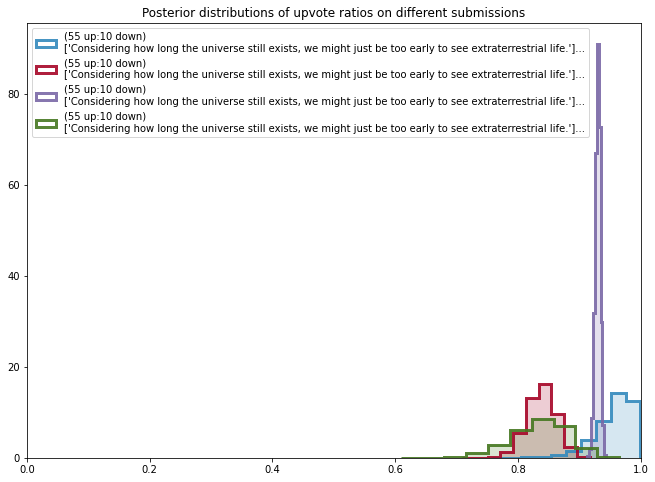

In [10]:
figsize(11., 8)
# 设置四种颜色
colours = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]
for i in range(len(submissions)):
    plt.hist(posteriors[i], bins=10, density=True, alpha=.9,
             histtype="step", color=colours[i % 5], lw=3,
             label='(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50]))
    plt.hist(posteriors[i], bins=10, density=True, alpha=.2,
             histtype="stepfilled", color=colours[i], lw=3, )

plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.title("Posterior distributions of upvote ratios on different submissions")

#### 排序

接下来就是对真实的好评率进行排序找到最佳评论。但是我们得到的是每条评论的分布，而分布是无法排序的，排序的只能是标量。

当然有很多方法能够从分布中提取标量值，用期望或均值来表示分布就是一种方法。但是，均值一定不是一个好办法，因为它没有考虑到分布的不决定性。

这里我们使用 **95% 的最小可信值** （也就是找到所有样本中的至少 95% 的数据所在的范围），并且画出后验分布：

[2 0 1 3] [0.8980955751688183, 0.7985265990256039, 0.9224781367062438, 0.75676518576781]


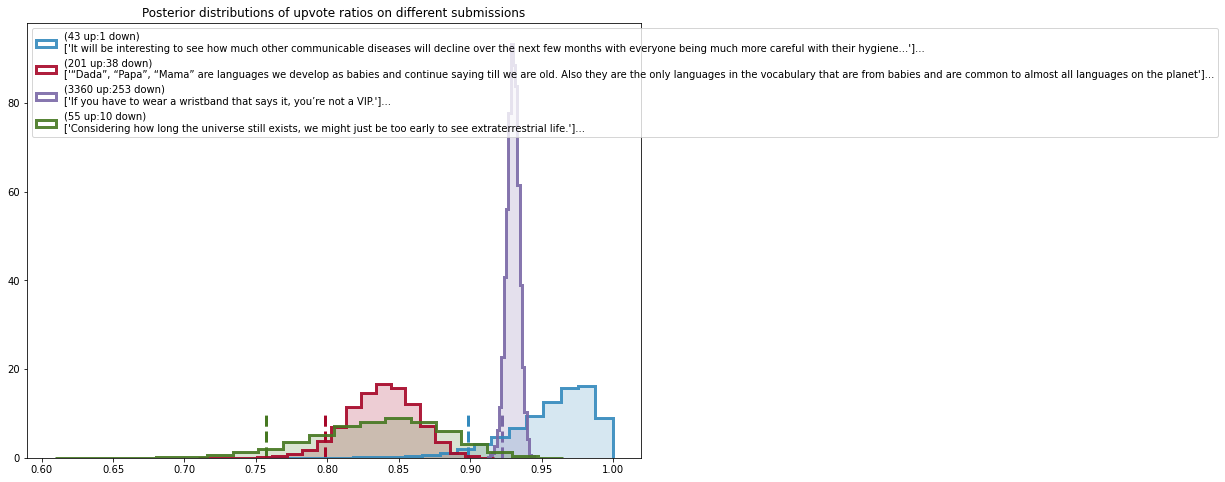

In [11]:
N = posteriors[0].shape[0]
lower_limits = []

for i in range(len(submissions)):
    j = submissions[i]
    # 只需要在画图时指定最小可信值 alpha 即可
    plt.hist(posteriors[i], bins=20, density=True, alpha=.9,
             histtype="step", color=colours[i], lw=3,
             label='(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50]))
    plt.hist(posteriors[i], bins=20, density=True, alpha=.2,
             histtype="stepfilled", color=colours[i], lw=3, )
    # 求出最小可信值
    v = np.sort(posteriors[i])[int(0.05*N)]
    plt.vlines(v, 0, 10, color=colours[i], linestyles="--",  linewidths=3)
    lower_limits.append(v)
    plt.legend(loc="upper left")

plt.legend(loc="upper left")
plt.title("Posterior distributions of upvote ratios on different submissions")
# 输出最小可信值
order = np.argsort(-np.array(lower_limits))
print(order, lower_limits)

上图中的垂直虚线表示的就是 95% 的最小可信值，最小可信值就是 95% 可信度下的范围的下界。根据我们的方法，最佳评论是最有可能得到高好评率的评论。因此，我们只需要找最小可信值中最接近于 1 的评论即可。


为何基于这个量的排序是个好主意呢？因为基于 95% 的最小可信值排序，是对最佳评论的保守估计。换句话说，即时在最差情况下，也能确保的正确率。这种排序思路可以保证下面两个特性：

1. 给定两个好评率相同的评论时，可以选择出票数最多的作为最佳评论。
2. 给定两个票数一样的评论，我们会选择好评数最多的。

####  实时性的优化

虽然上面的模型算法已经可以预测出每条评论的好评率的1后验分布，并进行排序。但是，我们可以很明显的看到，每一条评论的后验计算开销太大。而当我们计算完时，可能此时的数据又发生了变化。如果，我们可以使用公式直接计算每条评论的下界，就可以省去贝叶斯推断所消耗的时间。



由于下界的推断公式门槛过高，这里我们直接给出快速计算下界的公式（有兴趣推导的同学，可以本实验章节最后的补充说明）。


$$ \frac{a}{a + b} - 1.65\sqrt{ \frac{ab}{ (a+b)^2(a + b +1 ) } }$$

其中：
\begin{align}
& a = 1 + u \\\\
& b = 1 + d \\\\
\end{align}

其中 $u$ 表示赞同的票数，$d$ 表示反对的票数。其中 $\frac{a}{a + b}$其实就是该条评论后验分布的好评率的均值。 该公式是进行贝叶斯推断的一个捷径，我们将在后面的实验中分析其中的更多细节。 



In [12]:
def intervals(u, d):
    a = 1. + u
    b = 1. + d
    # 计算被减数，即后验均值
    mu = a/(a+b)
    # 计算减数，即容错数
    std_err = 1.65*np.sqrt((a*b)/((a+b)**2*(a+b+1.)))
    return (mu, std_err)


posterior_mean, std_err = intervals(votes[:, 0], votes[:, 1])
lb = posterior_mean - std_err
lb

array([0.92694916, 0.91524813, 0.90463379, 0.95594339, 0.90206147,
       0.92272407, 0.9651054 , 0.94307615, 0.93216819, 0.92315284,
       0.86517147, 0.84466478, 0.94835033, 0.85161622, 0.95855466,
       0.94905658, 0.97156355, 0.91548326, 0.95453973, 0.95156451,
       0.91549397, 0.87138037, 0.89123473, 0.77602471, 0.94751627,
       0.94671444, 0.93851463, 0.96053132, 0.90717924, 0.92157209,
       0.91723854, 0.79911113, 0.87163097, 0.84989264, 0.91736276,
       0.94648063, 0.60351455, 0.82350437, 0.88948377, 0.77194312,
       0.9362429 , 0.91704217, 0.90177806, 0.90154983, 0.8957555 ,
       0.95573025, 0.90144147, 0.80840738, 0.88347457, 0.90100914,
       0.87854886, 0.89478823, 0.90482438, 0.82997155, 0.89855577,
       0.89841991, 0.86337628, 0.88516682, 0.82856234, 0.88383904,
       0.61867496, 0.89042772, 0.79686974, 0.89882598, 0.85719803,
       0.8632917 , 0.85331368, 0.68891399, 0.90395676, 0.83900773,
       0.88796035, 0.80434387, 0.85331368, 0.86275119, 0.86055

([<matplotlib.axis.YTick at 0x7fe24ce1c4e0>,
 [Text(0, 39, 'A curse word was probably not invented by the person who said it first, but the first one to be offended by it.'),
  Text(0, 38, 'At some point, someone decided that yelling WOOOO was a pretty good way to verbalize enthusiasm, and everybody just went with it.'),
  Text(0, 37, 'You might actually be the dumbest person someone knows.'),
  Text(0, 36, 'A large majority of all the conversations you will have in your life will be between you and yourself.'),
  Text(0, 35, 'Cannibals would consider a vegan person "grass-fed"'),
  Text(0, 34, 'Thanks to things like Live Photos and digital picture frames, the moving pictures in Harry Potter aren’t that outlandish anymore.'),
  Text(0, 33, 'Clicking pens is one of those sounds you love to make but hate to hear.'),
  Text(0, 32, 'There was probably at least one guy back in Greek times that would get women to think he was Zeus just to get laid.'),
  Text(0, 31, 'Adults may get to do more

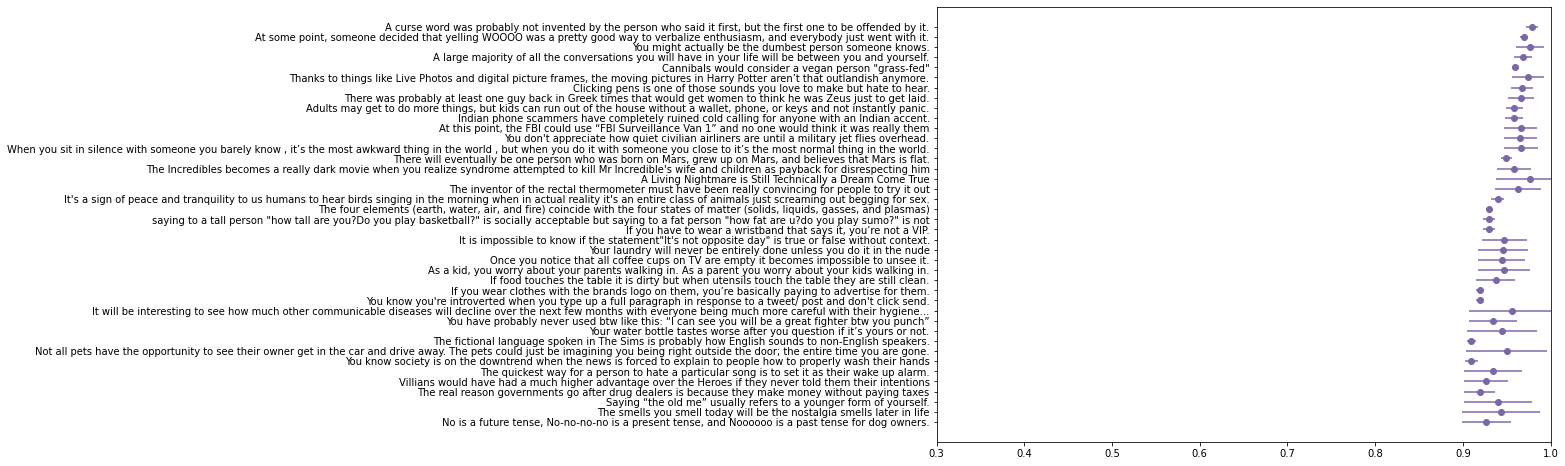

In [13]:
# 提取前40条正确率最高的评论的正确率和内容
order = np.argsort(-lb)
r_order = order[::-1][-40:]
ordered_contents = []
for i in order[:40]:
    ordered_contents.append(contents[i])
# 对他们进行可视化
plt.errorbar(posterior_mean[r_order], np.arange(len(r_order)),
             xerr=std_err[r_order], capsize=0, fmt="o",
             color="#7A68A6")
plt.xlim(0.3, 1)
plt.yticks(np.arange(len(r_order)-1, -1, -1),
           map(lambda x: x[:30][0].replace("\n", ""), ordered_contents))

#### 补充说明

本段内容涉及到上面公式的推断，可根据自身情况，自行跳过。


上面的贝叶斯推断其实主要用的就是 Beta 先验（即参数为 $a=1$,$b=1$ 的均匀分布）和二项式似然（ $u$ 次试验，$N = u+d$）。这意味着后验好评率是参数为 $a' = 1 + u, b' = 1 + (N - u) = 1+d$的 Beta 分布。 

因此，我们可以利用正态近似值。得到 Beta 分布的均值（即后验的分布的均值）为 $\mu = a'/(a'+b')$。

$$\sigma^2 = \frac{a'b'}{ (a' + b')^2(a'+b'+1) }$$

最后，我们只需要求解下面的式子，就能得到生成的数据 $x$ ，并得到相应的近似下界。

$$ 0.05 = \Phi\left( \frac{(x - \mu)}{\sigma}\right) $$ 


$\Phi$ 为正态分布的累计分布。 




### 实验总结

尽管大数定律非常好用，但是正如其名，它只适合于足够大的数据量。并且，当我们使用贝叶斯推断的时候，如果样本量很小，那么后验分布就会很宽，很分散，具有很大的随机性。